# Projeto de Leitura de Etiquetas com OCR em Python


por **Silas Ramos**

Introdução:

Este projeto tem como objetivo desenvolver um sistema de leitura de etiquetas com OCR utilizando a linguagem de programação Python. O sistema será capaz de capturar imagens das etiquetas, processá-las e extrair o texto presente nelas, permitindo uma leitura rápida e precisa das informações contidas.

Para alcançar esse objetivo, serão utilizadas bibliotecas e ferramentas populares de processamento de imagens e OCR em Python, como **OpenCV**, **Tesseract OCR** e outras bibliotecas relevantes. O **OpenCV** será utilizado para a manipulação e processamento de imagens, permitindo aprimorar a qualidade da imagem e prepará-la para o OCR. O **Tesseract OCR**, por sua vez, será responsável pela detecção e reconhecimento dos caracteres presentes nas imagens.

Esta solução tem aplicações em logística, varejo e automação industrial, esse projeto oferece uma solução eficiente e flexível para otimizar processos e reduzir erros na interpretação de informações de etiquetas.

In [6]:
#necessário instalar as bibliotecas OpenCV e 

#!pip install pytesseract
#!pip install pytesseract-ocr
#!pip install opencv-python

In [7]:
import cv2
import pandas as pd
from PIL import Image # Importando o módulo Pillow para abrir a imagem no script
import pytesseract # Módulo para a utilização da tecnologia OCR
pytesseract.pytesseract.tesseract_cmd = 'C:/OCR/Tesseract-OCR/tesseract.exe'

In [8]:
# Função para ler o texto em uma imagem usando OCR
def ler_etiqueta(imagem):
    # Carregar a imagem usando OpenCV
    img = cv2.imread(imagem)

    # Pré-processamento da imagem (opcional)
    # Aplicar técnicas de pré-processamento, como redimensionamento, ajuste de contraste, etc., se necessário

    # Converter a imagem para escala de cinza
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Aplicar OCR usando o Tesseract
    texto = pytesseract.image_to_string(img_gray)

    return texto


In [9]:

# Caminho da imagem da etiqueta
caminho_imagem = "Fotos_Jeny (21).jpg"

# Chamar a função de leitura de etiqueta
texto_etiqueta = ler_etiqueta(caminho_imagem)

# Exibir o texto da etiqueta
print("Texto na etiqueta:", texto_etiqueta)


Texto na etiqueta: we

av109
1t@d9-62
yv100 «18h 7Sl6L6l

ye Zane~

ere
METAL

 



In [10]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Função para realizar o pré-processamento da imagem
def preprocessamento_imagem(imagem):
    # Carregar a imagem usando OpenCV
    img = cv2.imread(imagem)

    # Converter a imagem para escala de cinza
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Aplicar limiarização adaptativa para binarizar a imagem
    img_threshold = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)

    # Aplicar operações morfológicas para remover ruídos e melhorar a qualidade do texto
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    img_processed = cv2.morphologyEx(img_threshold, cv2.MORPH_CLOSE, kernel)

    return img_processed

# Função para exibir as imagens
def exibir_imagens(imagens, titulos):
    fig, axs = plt.subplots(1, len(imagens), figsize=(12, 6))
    for i, (imagem, titulo) in enumerate(zip(imagens, titulos)):
        axs[i].imshow(imagem, cmap='gray')
        axs[i].set_title(titulo)
        axs[i].axis('off')
    plt.show()


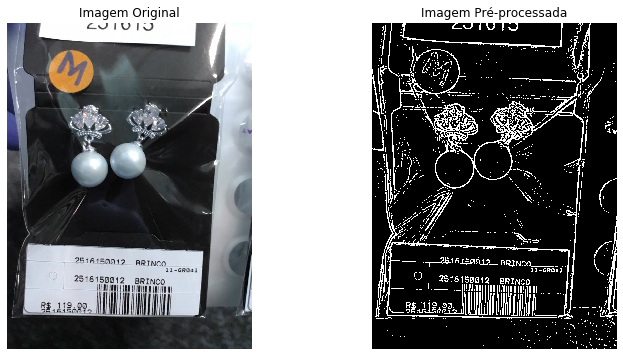

Texto na etiqueta:  



In [13]:

# Caminho da imagem da etiqueta
caminho_imagem = "Fotos_Jeny (6).jpg"

# Pré-processar a imagem
imagem_preprocessada = preprocessamento_imagem(caminho_imagem)

# Exibir as imagens original e pré-processada
exibir_imagens([cv2.imread(caminho_imagem), imagem_preprocessada], ["Imagem Original", "Imagem Pré-processada"])

# Converter a imagem pré-processada para texto usando OCR
texto_etiqueta = pytesseract.image_to_string(imagem_preprocessada)

# Exibir o texto da etiqueta
print("Texto na etiqueta:", texto_etiqueta)

In [44]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Função para realizar o pré-processamento da imagem
def preprocessamento_imagem(imagem):
    # Carregar a imagem usando OpenCV
    img = cv2.imread(imagem)

    # Converter a imagem para escala de cinza
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Aplicar limiarização adaptativa para binarizar a imagem
    img_threshold = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)

    # Aplicar operações morfológicas para remover ruídos e melhorar a qualidade do texto
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    img_processed = cv2.morphologyEx(img_threshold, cv2.MORPH_CLOSE, kernel)

    return img_processed

# Função para identificar a região com texto na imagem
def identificar_regiao_com_texto(imagem):
    # Encontrar contornos na imagem pré-processada
    contours, _ = cv2.findContours(imagem, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Encontrar a região com o maior contorno (assumindo que é a região com texto)
    maior_area = 0
    regiao_texto = None
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > maior_area:
            maior_area = area
            regiao_texto = contour

    # Criar uma máscara para a região com texto
    mascara = cv2.drawContours(imagem.copy(), [regiao_texto], -1, (200, 255, 0), cv2.FILLED)

    return mascara

# Função para exibir as imagens
def exibir_imagens(imagens, titulos):
    fig, axs = plt.subplots(1, len(imagens), figsize=(12, 6))
    for i, (imagem, titulo) in enumerate(zip(imagens, titulos)):
        axs[i].imshow(imagem, cmap='gray')
        axs[i].set_title(titulo)
        axs[i].axis('off')
    plt.show()




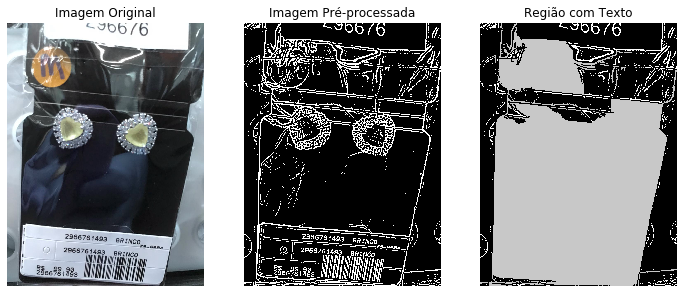

Texto na etiqueta:  



In [45]:
# Caminho da imagem da etiqueta
caminho_imagem = "Fotos_Jeny (8).jpg"

# Pré-processar a imagem
imagem_preprocessada = preprocessamento_imagem(caminho_imagem)

# Identificar a região com texto na imagem
regiao_texto = identificar_regiao_com_texto(imagem_preprocessada)

# Exibir as imagens original, pré-processada e a região com texto
exibir_imagens([cv2.imread(caminho_imagem), imagem_preprocessada, regiao_texto],
              ["Imagem Original", "Imagem Pré-processada", "Região com Texto"])

# Converter a região com texto para texto usando OCR
texto_etiqueta = pytesseract.image_to_string(regiao_texto)

# Exibir o texto da etiqueta
print("Texto na etiqueta:", texto_etiqueta)

In [42]:
print( pytesseract.image_to_string( Image.open('Fotos_Jeny (8).jpg') ) ) # Extraindo o texto da imagem

2966761493 BRINCO__

66
“il il it with nt MTT

38.298:38. ill vA

 



In [89]:
fotos_joias={}
for i in range(100):
        fotos_joias['Foto_'+str(i+1)]=(pytesseract.image_to_string( Image.open('Fotos_Jeny ('+str(i+1)+').jpg') ) )
print(fotos_joias)

FileNotFoundError: [Errno 2] No such file or directory: 'Fotos_Jeny (65).jpg'

In [90]:
df_joia=pd.DataFrame(list(fotos_joias.items()),
                   columns=['NºFOTO', 'Texto'])

df_joia


,NºFOTO,Texto
0,Foto_1,\n
1,Foto_2,\n
2,Foto_3,"298774195""\n\ni rg will\n; i|\n\n \n"
3,Foto_4,"2977310764 BRINCO, .\n\n2977310764 BRINC\n\nHN..."
4,Foto_5,“itl ill Il i\n\n \n\nBonB.2. i iW |\n
...,...,...
59,Foto_60,"298898\n\n \n\neae BRINCO,, GRO4I\n2988981491 ..."
60,Foto_61,"2936321491 BRINCO\n\nvil]\n\nmeet Mii\n\nsae, ..."
61,Foto_62,\n\n2914341474 BRINC CO gnaaz\n\n2914341474 B...
62,Foto_63,"\n\n2737080022 BRINCO,\n\nS-GR\n\n2737080022\..."


In [91]:
df_joia.to_excel("LISTA_JOIAS.xlsx")